# 01_data_exploration
This notebook explores the structure of the data and the distribution of the target variable. It attempts to first use PCA to reduce the dimensionality of the data and then visualize the data in 2D and 3D. Please set the kernel used to "loominglearn" to run this notebook (assuming that the environment has been set up correctly as described in the README).

In [1]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from LoominglearnSettings import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv(os.path.join(INPUTDIR, 'SPF30data_reorganised.csv'), index_col=0)
input_features = data.values.transpose()
input_features.shape

(32, 17)

In [3]:
pca_engine = PCA(n_components=2)
scaled_features = StandardScaler().fit_transform(input_features)
lower_dim_features = pca_engine.fit_transform(scaled_features)

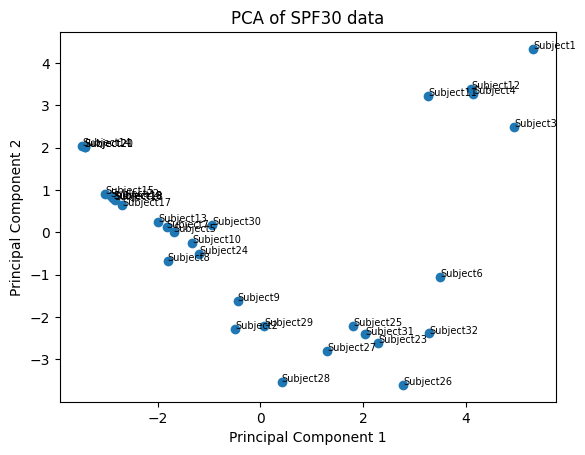

In [4]:
# plot the first two principal components
plt.scatter(lower_dim_features[:, 0], lower_dim_features[:, 1])
# label the points with Subject1, 2, 3,...,etc
for i, txt in enumerate(data.columns):
    plt.annotate(txt, (lower_dim_features[i, 0], lower_dim_features[i, 1]), fontsize=7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of SPF30 data')
plt.savefig(os.path.join(OUTPUTDIR, 'PCA_SPF30.png'))

In [6]:
import plotly.express as px
fig = px.scatter(x=lower_dim_features[:, 0], y=lower_dim_features[:, 1], text=data.columns)
fig.update_traces(textposition='top center')
fig.update_layout(title='PCA of SPF30 data')
fig.write_html(os.path.join(OUTPUTDIR, 'PCA_SPF30.html'))

In [115]:
# analyse the explained variance ratio
pca_engine.explained_variance_ratio_


array([0.45118352, 0.26650198])

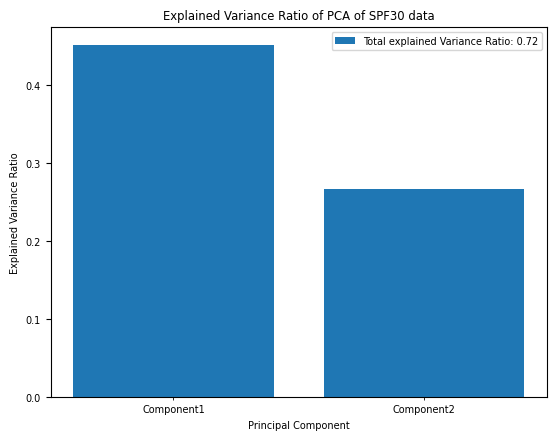

In [116]:
plt.bar(range(1, len(pca_engine.explained_variance_ratio_)+1), pca_engine.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of PCA of SPF30 data')
# remove xticks
plt.xticks([])
# add Component1, component2, as xticks
plt.gca().set_xticks([1, 2], minor=True)
plt.gca().set_xticklabels(['Component1', 'Component2'], minor=True)
plt.savefig(os.path.join(OUTPUTDIR, 'PCA_SPF30_explained_variance_ratio.png'))
# add legend saying the sum of the two components
plt.legend(['Total explained Variance Ratio: {:.2f}'.format(pca_engine.explained_variance_ratio_[0] + pca_engine.explained_variance_ratio_[1])])

## Playing with hierarchial clustering

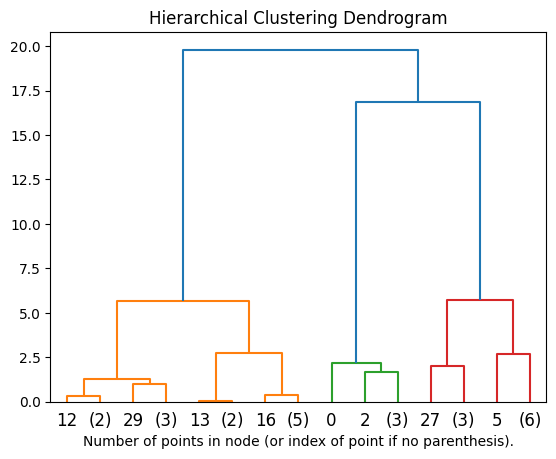

In [7]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from data.data import *


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(lower_dim_features)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.savefig(os.path.join(OUTPUTDIR, 'dendrogram.png'))

In [8]:
four_cluster_model = AgglomerativeClustering(n_clusters=3)
cluster_assignment = four_cluster_model.fit_predict(lower_dim_features)

In [9]:
pd.DataFrame({'Subject': data.columns, 'Cluster': cluster_assignment}).to_csv(os.path.join(OUTPUTDIR, 'PCA_SPF30_cluster_assignment.csv'), index=False)